<a href="https://colab.research.google.com/github/ewapajak/ML/blob/main/homework1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data
--------------------

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$


#Loading our dataset

In [45]:
import pandas as pd

url = "https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/refs/heads/master/PCA_three_clusters_data.csv"
df = pd.read_csv(url)

print("Column Names:")
print(df.columns)

print("\nData: ")
print(df)

print("\nFirst 5 Rows:")
print(df.head())

print("\nClass count: ")
print(df['class'].value_counts())


Column Names:
Index(['x', 'y', 'z', 'class'], dtype='object')

Data: 
            x         y          z  class
0    0.647689 -0.138264   3.512299      0
1   -0.234137 -0.234153  10.769447      0
2   -0.469474  0.767435  11.166721      0
3   -0.465730 -0.463418   3.836479      0
4   -1.724918 -1.913280   1.710932      0
..        ...       ...        ...    ...
295  4.640708  0.583928  13.058193      2
296  5.820482  1.108704   4.176560      2
297  6.169296  1.066675   3.586969      2
298  4.832882  0.648710   9.773340      2
299  4.183064  1.206509   1.037422      2

[300 rows x 4 columns]

First 5 Rows:
          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0

Class count: 
class
0    100
1    100
2    100
Name: count, dtype: int64


#Visualizing our dataset:

### **3D plot:**

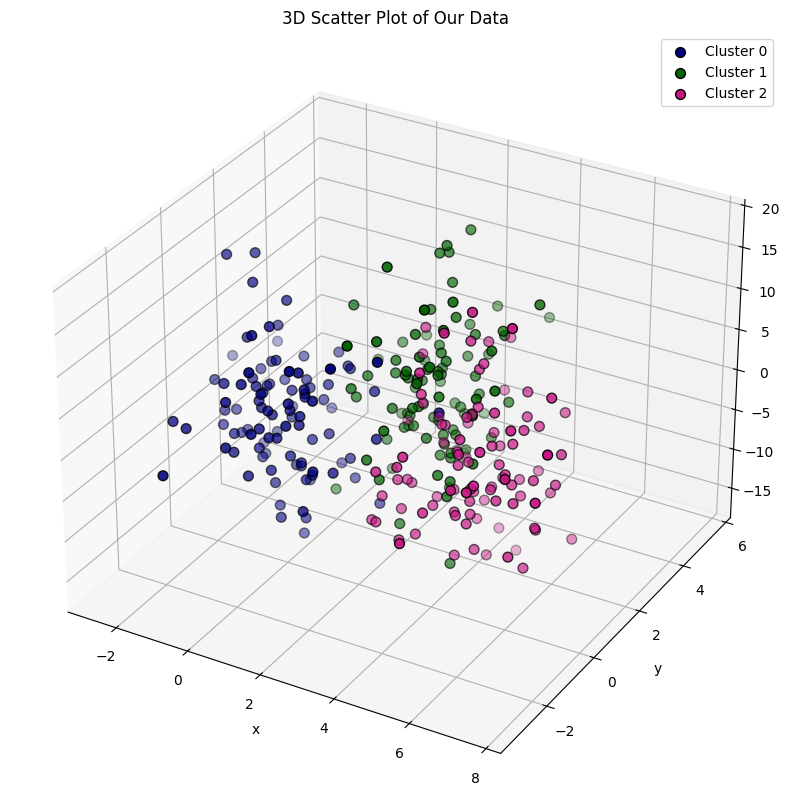

In [48]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors ={"0" : "navy", "1" : "darkgreen", "2" : "mediumvioletred"}

for cluster in df['class'].unique():
    cluster_data = df[df['class'] == cluster]
    ax.scatter(cluster_data['x'], cluster_data['y'], cluster_data['z'], color=colors[str(cluster)], label=f'Cluster {cluster}', s = 50, edgecolors= 'k')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("x")
ax.set_title("3D Scatter Plot of Our Data")
ax.legend()
plt.show()


### **2D plots:**

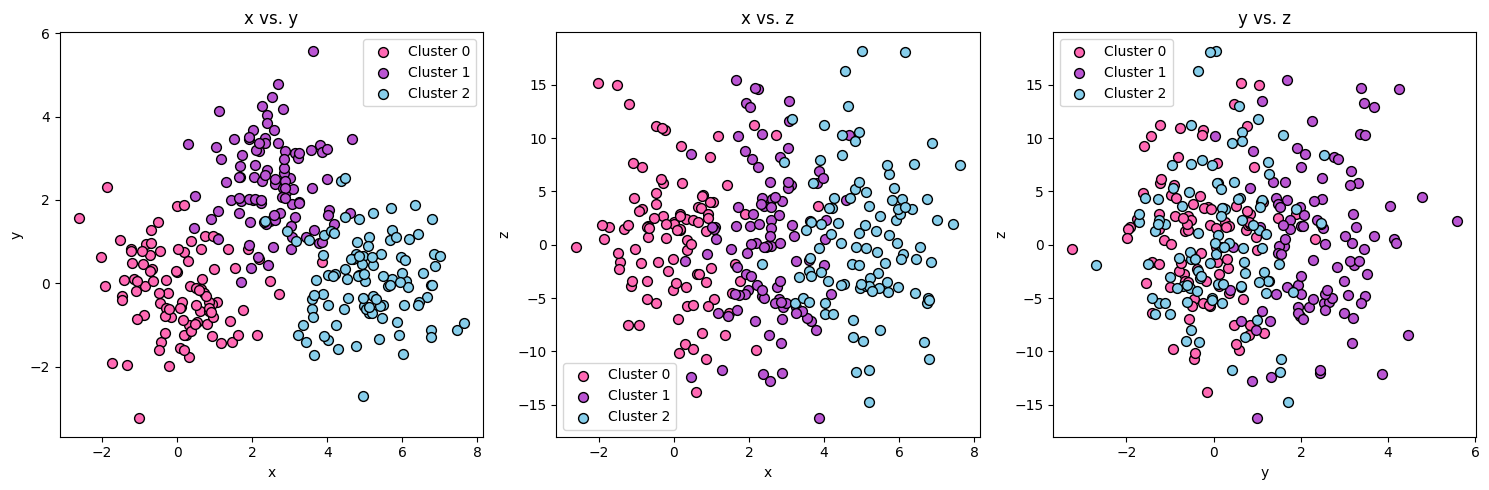

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors2 ={"0" : "hotpink", "1" : "mediumorchid", "2" : "skyblue"}
pairs = [('x', 'y'), ('x', 'z'), ('y', 'z')]

for i, (x_ax, y_ax) in enumerate(pairs):
  for cluser in df['class'].unique():
    cluster_data = df[df['class'] == cluser]
    axes[i].scatter(cluster_data[x_ax], cluster_data[y_ax], color=colors2[str(cluser)], label=f'Cluster {cluser}', s = 50, edgecolors= 'k')

  axes[i].set_xlabel(x_ax)
  axes[i].set_ylabel(y_ax)
  axes[i].set_title(f'{x_ax} vs. {y_ax}')
  axes[i].legend()


plt.tight_layout()
plt.show()



#Principle Component Analysis

The principle components: 
[[ 0.72005783  0.56946    -0.39652494]
 [-0.02368275  0.59126692  0.80612813]]

X projected onto V (first 7 rows): 
[[-1.12582206  0.05986874]
 [-1.89368654  0.95808305]
 [-1.61886158  1.39907438]
 [-1.61654666 -0.01318696]
 [-2.41865284 -0.83294294]
 [-1.08642643 -1.23111585]
 [-0.72091981 -1.70971126]]

Explained variance ratio:
[0.34722276 0.33441835]

Cumulative explained variance ratio:
[0.34722276 0.68164111]


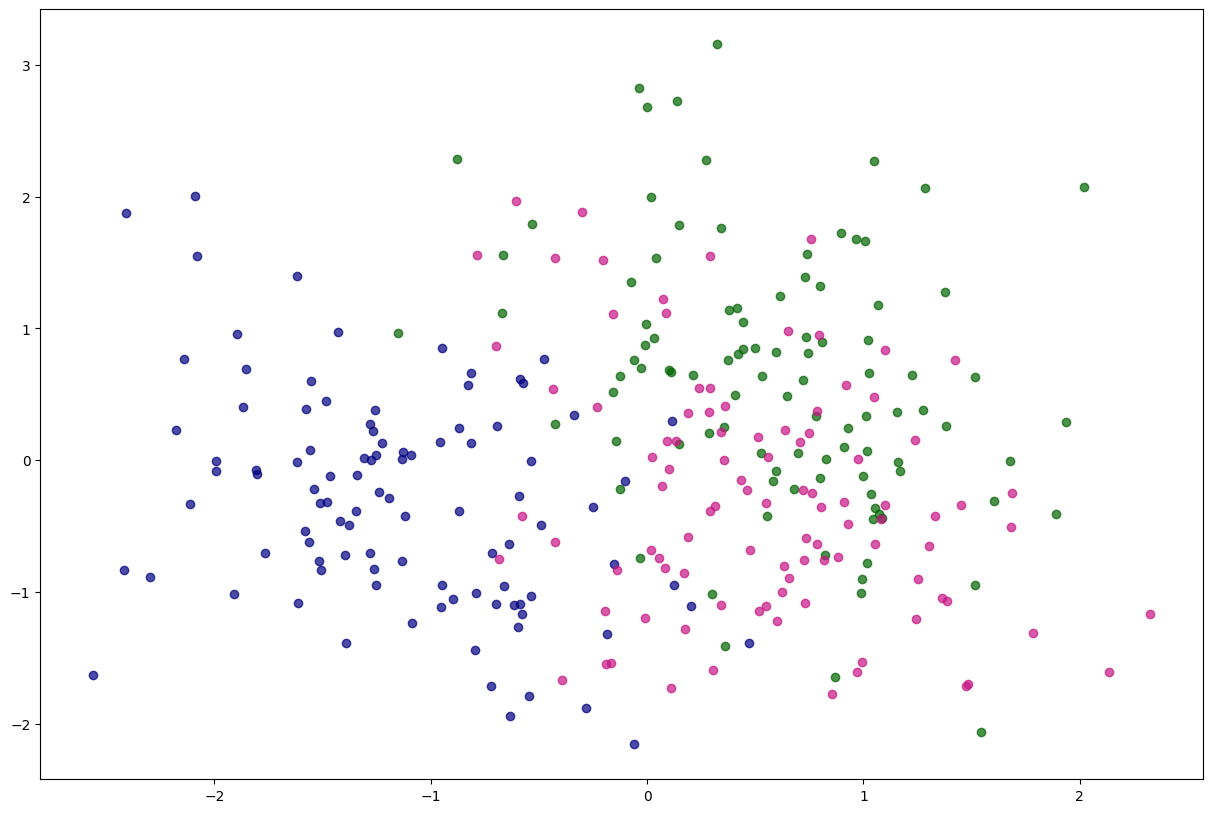

In [66]:
import numpy as np

X= df[['x', 'y', 'z']].values
y = df['class'].values

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components = 2)
XV = pca.fit_transform(X_standardized)

print("The principle components: ")
print(pca.components_)

print("\nX projected onto V (first 7 rows): ")
print(XV[:7])

print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)


print("\nCumulative explained variance ratio:")
print(np.cumsum(pca.explained_variance_ratio_))


colors3 ={"0" : "hotpink", "1" : "mediumorchid", "2" : "skyblue"}

plt.figure(figsize = (15,10))
for cluster in np.unique(y):
    plt.scatter(XV[y == cluster, 0], XV[y == cluster, 1],
                color=colors[str(cluster)], label=f'Cluster {cluster}', alpha=0.7)